# Melbourne Housing Market

### Goal
The goal of this project is to create a model to predict a house's value.

In [58]:
# setting environment
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
# read in data
housing_raw = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [60]:
# check the data size
housing_raw.shape

(63023, 13)

In [61]:
# check the data info
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [62]:
housing_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [63]:
# check how many missing values in each column
housing_raw.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

Since this is a supervised learning project and our target variable is `Price`, we should drop the rows if there are missing labels, in this case we can see there are 14590 missing labels

In [64]:
# drop the rows that has missing value in price column
housing_raw.dropna(subset=['Price'], inplace=True)

In [65]:
housing_raw.shape

(48433, 13)

In [66]:
# check how many unique values in each column
housing_raw.nunique().sort_values(ascending=False)

Address          44739
Price             3417
SellerG            422
Suburb             370
Propertycount      359
Postcode           221
Distance           176
Date               112
CouncilArea         34
Rooms               14
Regionname           8
Method               5
Type                 3
dtype: int64

We first deal with the address part, since the whole address has too many unique values as close as the number of examples we have, we definitely need to do some massage of the feature if we are trying to extract the information out of it, one thing we could do is to extract the street name, since the price value highly depends on the street that is located, this is often true in almost every where, and we are dealing with Melbourne city only, so it is very unlikely that we have two streets that have the same name

In [67]:
# extract only the street name
housing_raw['St_name'] = housing_raw['Address'].str.split().str[-2]

In [68]:
# check the st_name columns just created
housing_raw['St_name'].nunique()

9181

Looks like we have reduce 80% of the unique value, but there are still over 9000 unique names, let's check how many examples are there for a particular name

In [69]:
housing_raw['St_name'].value_counts()

The           323
Park          196
High          189
Victoria      177
Barkly        165
Albert        156
Station       149
Dandenong     124
Gordon        108
North         108
Murray        107
Charles       106
Beach         105
Nepean         99
Wellington     95
Church         90
Nicholson      89
Toorak         87
William        87
South          86
York           86
Thomas         84
Queens         81
Waverley       81
Union          80
George         80
Alexander      79
Kilda          79
Collins        78
Canterbury     78
             ... 
Etnam           1
Herman          1
Doolan          1
Eaststone       1
Glendowan       1
Woorarra        1
Tormey          1
webster         1
Shikra          1
Healey          1
Clonard         1
Orgill          1
Woolnough       1
Bishops         1
Fuge            1
Kingscote       1
Hodson          1
Amiel           1
Gabriel         1
Schneider       1
Woodlawn        1
Metelman        1
Fairland        1
Vandeven        1
Halston   

We will further reduce the `St_name` column to only 200 unique values, and assign the rest to "Others"

In [70]:
# define function to change the values
index = housing_raw['St_name'].value_counts().head(199).index
def change_name(col):
    
    if col in index:
        return col
    else:
        return 'Others'
change_name_v = np.vectorize(change_name)

In [71]:
housing_raw['St_name'] = change_name_v(housing_raw['St_name'])

In [72]:
# double check if the unique value is equal to 100
housing_raw['St_name'].nunique()

200

In [73]:
housing_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,St_name
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Yarra
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,Others
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,Others


In [74]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 14 columns):
Suburb           48433 non-null object
Address          48433 non-null object
Rooms            48433 non-null int64
Type             48433 non-null object
Price            48433 non-null float64
Method           48433 non-null object
SellerG          48433 non-null object
Date             48433 non-null object
Postcode         48433 non-null int64
Regionname       48433 non-null object
Propertycount    48433 non-null int64
Distance         48433 non-null float64
CouncilArea      48433 non-null object
St_name          48433 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 5.5+ MB


Now we deal with `Suburb` column

In [75]:
housing_raw['Suburb'].value_counts()

Reservoir           1067
Bentleigh East       696
Richmond             642
Craigieburn          598
Preston              593
Mount Waverley       556
Brunswick            540
Northcote            496
Cheltenham           493
Glen Waverley        486
Essendon             485
Glenroy              482
Coburg               464
Mill Park            454
South Yarra          436
Glen Iris            434
Pascoe Vale          433
Bundoora             431
Kew                  430
Hawthorn             429
Epping               421
St Kilda             410
Balwyn North         407
Brighton             404
Thornbury            394
Doncaster East       393
Hoppers Crossing     381
Bentleigh            378
Camberwell           376
Brighton East        366
                    ... 
Lyndhurst              2
Ferny Creek            2
Kilsyth South          2
Cranbourne South       2
Werribee South         2
Panton Hill            2
Belgrave South         1
Yan Yean               1
Cockatoo               1


We can apply the same idea on `Suburb` column, this time we will keep the threshold at 50, if the number of examples is less than 50 we will assign value "Others"

In [76]:
temp = housing_raw['Suburb'].value_counts()
temp = temp[temp>50]
index = temp.index
def change_name_2(col):
    
    if col in index:
        return col
    else:
        return 'Others'
change_name_2_v = np.vectorize(change_name_2)

In [77]:
housing_raw['Suburb'] = change_name_2_v(housing_raw['Suburb'])

In [78]:
housing_raw['Suburb'].value_counts().sort_values(ascending=True)

Cremorne               51
Aspendale Gardens      51
East Melbourne         51
Eaglemont              52
Melton West            56
Endeavour Hills        57
Lower Plenty           57
Carrum Downs           58
Watsonia North         58
Essendon North         59
Delahey                60
Melton                 60
Bonbeach               62
Dallas                 63
Middle Park            64
Keilor                 64
West Melbourne         65
Ivanhoe East           66
Jacana                 66
Spotswood              67
Briar Hill             67
Altona Meadows         67
Yallambie              69
Ringwood North         69
Parkville              70
Glen Huntly            70
Eltham North           71
Hughesdale             72
Carrum                 73
Diamond Creek          73
                     ... 
Camberwell            376
Bentleigh             378
Hoppers Crossing      381
Doncaster East        393
Thornbury             394
Brighton              404
Balwyn North          407
St Kilda    

In [79]:
housing_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,St_name
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Yarra
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,Others
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,Others


Next we will transform the `Postcode` column, originally it has integer type, but it should be a categorical variable since this is more like a zipcode thing and the number itself should not have any sort of order or ratio between two. We will transform it to string data type.

In [80]:
housing_raw['Postcode'] = housing_raw['Postcode'].astype('str')

We will then deal with the `Date` data, the easiet way is to separate the information into three different columns: `day`, `month` and `year`

In [81]:
# extract day, month and year information from Date column, assign the data type as integer
housing_raw['Day'] = housing_raw['Date'].str.split('/').str[0].astype('int')
housing_raw['Month'] = housing_raw['Date'].str.split('/').str[1].astype('int')
housing_raw['Year'] = housing_raw['Date'].str.split('/').str[2].astype('int')

Let's make some plot to see if there is any seasonality information 

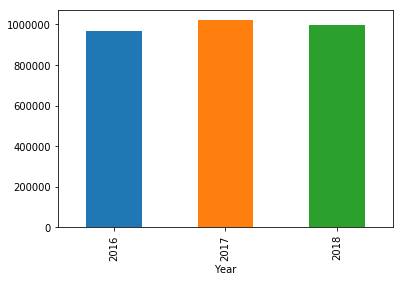

In [82]:
# groupby the year
housing_raw.groupby('Year')['Price'].mean().plot(kind='bar')
plt.show()

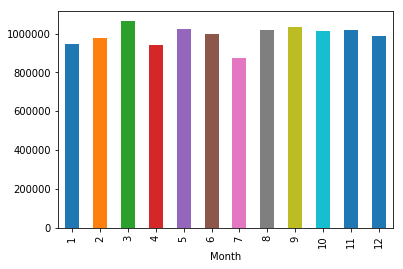

In [83]:
# groupby the month
housing_raw.groupby('Month')['Price'].mean().plot(kind='bar')
plt.show()

It seems that price goes up from 2016 to 2017 and dropped again from 2017 to 2018, however, there does not seem to have much trend in month vs price plot

In [84]:
# examine the correlation between price and day, month, year
housing_raw.corr()['Price']

Rooms            0.412438
Price            1.000000
Propertycount   -0.060769
Distance        -0.253668
Day              0.011878
Month            0.011264
Year             0.017652
Name: Price, dtype: float64

From above, we can see that the correlation between `Price` variable and `Day`, `Month`, `Year` are pretty low, we will transform them back to categorical variable since that keep it as numeric does not seem to help with our analysis

In [85]:
housing_raw['Day'] = housing_raw['Day'].astype('str')
housing_raw['Month'] = housing_raw['Month'].astype('str')
housing_raw['Year'] = housing_raw['Year'].astype('str')

Next, we will drop some unecessary columns such as `Address`, `SellerG` and `Date`

In [86]:
housing_raw.drop(['Address', 'SellerG', 'Date'], axis=1, inplace=True)

In [87]:
housing_raw.head()

,Suburb,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea,St_name,Day,Month,Year
0,Abbotsford,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others,1,4,2017
1,Abbotsford,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Others,1,4,2017
2,Abbotsford,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council,Yarra,1,4,2017
3,Aberfeldie,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,Others,1,4,2017
4,Airport West,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,Others,1,4,2017


In the last step before fitting model, we will transform our categorical variables to dummies

In [88]:
housing_raw = pd.get_dummies(housing_raw)

In [89]:
# check the data shape
housing_raw.shape

(48433, 752)

In [90]:
# split the data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_raw.drop('Price', axis=1), housing_raw['Price'],
                                                   test_size=0.3, random_state=1009)

Our first approach is to use different ML models without doing any feature selection. Before fitting our model, we will define a function that implements gridsearch to find the best accuracy as well as time it takes to fit and predict to come up with a creteria of good model

In [91]:
# define a function that performs gridsearch to tune hyperparameters
from sklearn.model_selection import GridSearchCV
def get_best_model_MSE(model, params, X, y):
    grid = GridSearchCV(model, params, error_score=0., cv=5, scoring='neg_mean_squared_error') # use MSE for 
    # regression evaluation 
    grid.fit(X, y)
    # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    

### Linear regression

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_params = {'fit_intercept': [True, False],
             'normalize': [True, False]}
get_best_model_MSE(lr, lr_params, X_train, y_train)

Best Accuracy: -9.80344358259375e+20
Best Parameters: {'fit_intercept': False, 'normalize': True}
Average Time to Fit (s): 2.182
Average Time to Score (s): 0.022


### Ridge regression

In [119]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd_params = {'alpha': [10, 100, 1000, 1e5]}
get_best_model_MSE(rd, rd_params, X_train, y_train)

Best Accuracy: -126243321594.54077
Best Parameters: {'alpha': 10}
Average Time to Fit (s): 0.615
Average Time to Score (s): 0.024


### Lasso regression

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
get_best_model_MSE(lasso, lasso_params, X_train, y_train)

Best Accuracy: -126342425481.03487
Best Parameters: {'alpha': 10}
Average Time to Fit (s): 39.2
Average Time to Score (s): 0.022


### Decision tree

In [128]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree_params = {'max_depth': [1,3,5,7,9]}
get_best_model_MSE(tree, tree_params, X_train, y_train)

Best Accuracy: -112207217455.77135
Best Parameters: {'max_depth': 9}
Average Time to Fit (s): 0.646
Average Time to Score (s): 0.03


### Random forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_params = {'max_depth': [1,3,5,7,9]}
get_best_model_MSE(rf, rf_params, X_train, y_train)

Best Accuracy: -102450777858.06456
Best Parameters: {'max_depth': 9}
Average Time to Fit (s): 2.968
Average Time to Score (s): 0.03


### Support vector machine

In [134]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr_params = {'C': [0.01, 0.1, 1, 10, 100]}
get_best_model_MSE(svr, svr_params, X_train, y_train)

Best Accuracy: -368526922667.81586
Best Parameters: {'C': 10}
Average Time to Fit (s): 2.964
Average Time to Score (s): 0.023


### Gradient boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_params = {'learning_rate': [0.01, 0.05, 0.1, 0.5]}
get_best_model_MSE(gbr, gbr_params, X_train, y_train)

Best Accuracy: -97287788255.11545
Best Parameters: {'learning_rate': 0.5}
Average Time to Fit (s): 41.108
Average Time to Score (s): 0.095


From the modeling fitting result showing above, we can see that tree model have both pretty good performance in terms of time and bias, Gradient boosting has the lowest average MSE but the time it takes to fit is pretty long, we will pick the best parameters for all models showing except linear regression(which has a insanely high MSE) on our test set

In [92]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
%%time
# Ridge regression
rd = Ridge(alpha=10)
rd.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, rd.predict(X_test))))

Performance: 119322151931.39432
CPU times: user 2.2 s, sys: 303 ms, total: 2.51 s
Wall time: 1.07 s


In [96]:
%%time
# Lasso regression
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, lasso.predict(X_test))))

Performance: 119444635233.76163
CPU times: user 46.2 s, sys: 396 ms, total: 46.6 s
Wall time: 46.3 s


In [97]:
%%time
# Decision tree
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, tree.predict(X_test))))

Performance: 109206991820.91115
CPU times: user 1.05 s, sys: 155 ms, total: 1.2 s
Wall time: 1.18 s


In [98]:
%%time
# Random forest
rf = RandomForestRegressor(max_depth=9)
rf.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, rf.predict(X_test))))

Performance: 99525576291.9538
CPU times: user 6.53 s, sys: 127 ms, total: 6.65 s
Wall time: 6.66 s


In [99]:
%%time
# Support vector machine
svr = LinearSVR(C=10)
svr.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, svr.predict(X_test))))

Performance: 568905867286.5603
CPU times: user 5.64 s, sys: 189 ms, total: 5.83 s
Wall time: 5.79 s


In [102]:
%%time
# Gradient boosting
gbr = GradientBoostingRegressor(learning_rate= 0.5)
gbr.fit(X_train, y_train)
print('Performance: {}'.format(mean_squared_error(y_test, gbr.predict(X_test))))

Performance: 96552690431.01418
CPU times: user 38.3 s, sys: 303 ms, total: 38.6 s
Wall time: 38.6 s
